In [ ]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
%matplotlib inline

# load dataset
df = pd.read_csv('/content/Breast_Cancer_Wisconsin.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# y includes our labels and x includes our features
#y = df.diagnosis                          # M or B
list = ['Unnamed: 32','id']
df = df.drop(list,axis = 1 )
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

'radius_mean', 'perimeter_mean',
       'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se','smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'


In [ ]:
drop_list = ['radius_mean', 'perimeter_mean',
       'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se','smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
df =df.drop(drop_list,axis = 1 )        # do not modify x, we will use it later
df.head()

,diagnosis,texture_mean,area_mean,concavity_mean,area_se,concavity_worst
0,M,10.38,1001.0,0.3001,153.40,0.7119
1,M,17.77,1326.0,0.0869,74.08,0.2416
2,M,21.25,1203.0,0.1974,94.03,0.4504
3,M,20.38,386.1,0.2414,27.23,0.6869
4,M,14.34,1297.0,0.1980,94.44,0.4000


In [ ]:
df['sample_id'] = np.arange(0, df.shape[0], 1).astype(str)
df['id'] = df['sample_id'].apply(lambda x:  'h'+x)
df.drop(columns=['sample_id'], inplace=True)
df=df.set_index('id')
df

,diagnosis,texture_mean,area_mean,concavity_mean,area_se,concavity_worst
id,,,,,,
h0,M,10.38,1001.0,0.30010,153.40,0.7119
h1,M,17.77,1326.0,0.08690,74.08,0.2416
h2,M,21.25,1203.0,0.19740,94.03,0.4504
h3,M,20.38,386.1,0.24140,27.23,0.6869
h4,M,14.34,1297.0,0.19800,94.44,0.4000
...,...,...,...,...,...,...
h564,M,22.39,1479.0,0.24390,158.70,0.4107
h565,M,28.25,1261.0,0.14400,99.04,0.3215
h566,M,28.08,858.1,0.09251,48.55,0.3403


In [ ]:
df['diagnosis'] = df['diagnosis'] == 'M'
df

,diagnosis,texture_mean,area_mean,concavity_mean,area_se,concavity_worst
id,,,,,,
h0,True,10.38,1001.0,0.30010,153.40,0.7119
h1,True,17.77,1326.0,0.08690,74.08,0.2416
h2,True,21.25,1203.0,0.19740,94.03,0.4504
h3,True,20.38,386.1,0.24140,27.23,0.6869
h4,True,14.34,1297.0,0.19800,94.44,0.4000
...,...,...,...,...,...,...
h564,True,22.39,1479.0,0.24390,158.70,0.4107
h565,True,28.25,1261.0,0.14400,99.04,0.3215
h566,True,28.08,858.1,0.09251,48.55,0.3403


In [ ]:
y = df['diagnosis']

[Text(0.5, 0.75, 'x[0] <= 0.26\ngini = 0.468\nsamples = 569\nvalue = [357, 212]'),
 Text(0.25, 0.25, 'gini = 0.128\nsamples = 319\nvalue = [297, 22]'),
 Text(0.75, 0.25, 'gini = 0.365\nsamples = 250\nvalue = [60, 190]')]

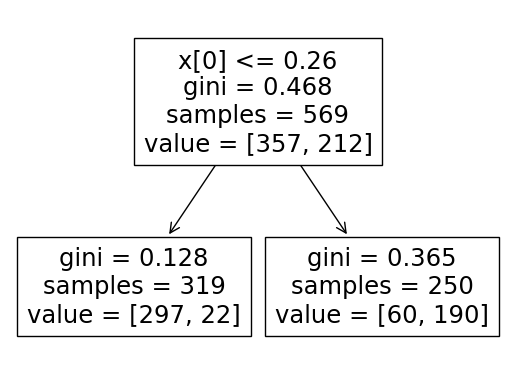

In [ ]:
#from sklearn.datasets import load_iris
from sklearn import tree
#iris = load_iris()
X, y =  pd.DataFrame(df['concavity_worst']), y
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X, y)
tree.plot_tree(clf)

[Text(0.5, 0.75, 'x[0] <= 31.285\ngini = 0.468\nsamples = 569\nvalue = [357, 212]'),
 Text(0.25, 0.25, 'gini = 0.181\nsamples = 358\nvalue = [322, 36]'),
 Text(0.75, 0.25, 'gini = 0.277\nsamples = 211\nvalue = [35, 176]')]

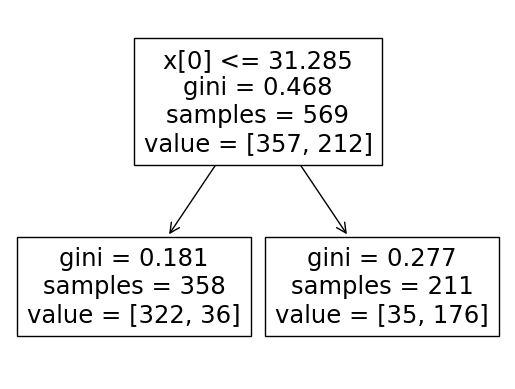

In [ ]:
X, y =  pd.DataFrame(df['area_se']), y
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X, y)
tree.plot_tree(clf)

[Text(0.5, 0.75, 'x[0] <= 0.093\ngini = 0.468\nsamples = 569\nvalue = [357, 212]'),
 Text(0.25, 0.25, 'gini = 0.164\nsamples = 356\nvalue = [324, 32]'),
 Text(0.75, 0.25, 'gini = 0.262\nsamples = 213\nvalue = [33, 180]')]

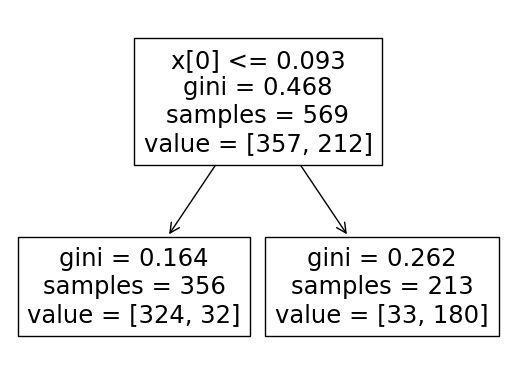

In [ ]:
X, y =  pd.DataFrame(df['concavity_mean']), y
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X, y)
tree.plot_tree(clf)

[Text(0.5, 0.75, 'x[0] <= 696.25\ngini = 0.468\nsamples = 569\nvalue = [357, 212]'),
 Text(0.25, 0.25, 'gini = 0.22\nsamples = 397\nvalue = [347, 50]'),
 Text(0.75, 0.25, 'gini = 0.11\nsamples = 172\nvalue = [10, 162]')]

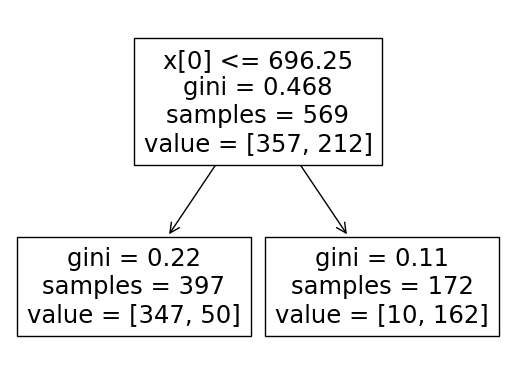

In [ ]:
X, y =  pd.DataFrame(df['area_mean']), y
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X, y)
tree.plot_tree(clf)

[Text(0.5, 0.75, 'x[0] <= 19.47\ngini = 0.468\nsamples = 569\nvalue = [357, 212]'),
 Text(0.25, 0.25, 'gini = 0.288\nsamples = 316\nvalue = [261, 55]'),
 Text(0.75, 0.25, 'gini = 0.471\nsamples = 253\nvalue = [96, 157]')]

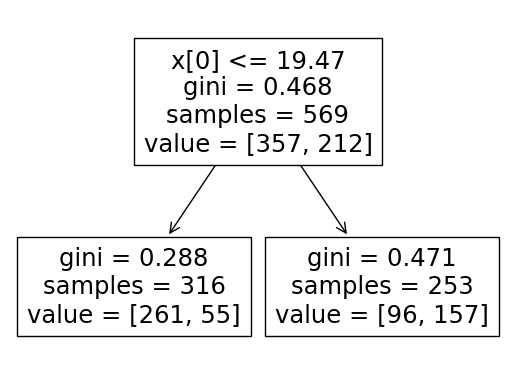

In [ ]:
X, y =  pd.DataFrame(df['texture_mean']), y
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [ ]:
df['texture_mean <= 19.47'] = df['texture_mean'] <= 19.47
df['area_mean <= 696.25'] = df['area_mean'] <=696.25
df['concavity_mean <= 0.093']  = df['concavity_mean'] <= 0.093
df['concavity_worst <= 0.26'] = df['concavity_worst'] <= 0.26
df['area_se <= 31.285'] = df['area_se'] <= 31.285

drop_list1 = ['texture_mean','area_mean','concavity_mean','concavity_worst', 'area_se' ]
df =df.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later
df.head()

,diagnosis,texture_mean <= 19.47,area_mean <= 696.25,concavity_mean <= 0.093,concavity_worst <= 0.26,area_se <= 31.285
id,,,,,,
h0,True,True,False,False,False,False
h1,True,True,False,True,True,False
h2,True,False,False,False,False,False
h3,True,False,True,False,False,True
h4,True,True,False,False,False,False


In [ ]:
df.to_csv('Breast_cancer_w_bin.csv')